In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from datetime import datetime
from sklearn.model_selection import cross_val_score

In [20]:
df = pd.read_csv("/content/drive/MyDrive/dataset/Churn_Modelling.csv")


In [21]:
# Get correlations of features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index

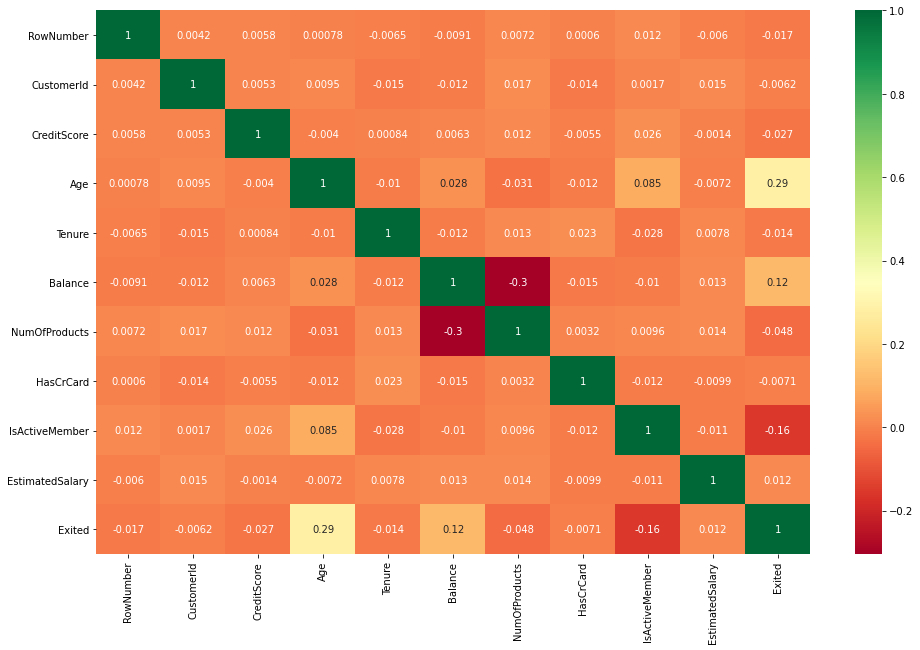

In [22]:
# Plotting the correlation using heatmap
plt.figure(figsize=(16, 10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [23]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [24]:
geography = pd.get_dummies(X['Geography'], drop_first=True)


In [25]:
geography.head()


,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [26]:
gender = pd.get_dummies(X['Gender'], drop_first=True)
gender.head()


,Male
0,0
1,0
2,0
3,0
4,0


In [27]:
# Drop Categorical features

X = X.drop(['Geography', 'Gender'], axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [28]:
# Concatenating the geography and gender dummy features

X = pd.concat([X, geography, gender], axis=1)


X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
params = {
    'learning_rate': [0.05, .10, .15, .2, .25, .3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [3, 5, 7, 9],
    'gamma': [.2, .3, .4, .5, .6],
    'colsample_bytree': [.3, .4, .5, .7]
}

In [30]:
def timer(start_time = None):
        if not start_time:
            start_time = datetime.now()
            return start_time
        elif start_time:
            thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
            tmin, tsec = divmod(temp_sec, 60)
            print('\n Timetaken:%i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [31]:
classifier = xgboost.XGBClassifier()


In [32]:
random_search = RandomizedSearchCV(classifier, param_distributions=params,
                                   n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [35]:
# Timing starts from this point for 'start_time' variable
start_time = timer(None)
random_search.fit(X, y)
timer(start_time) 
# Timing ends here for 'start_time' variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.0s finished



 Timetaken:0 hours 0 minutes and 17.56 seconds.


In [36]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.6,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
random_search.best_params_


{'colsample_bytree': 0.5,
 'gamma': 0.6,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 5}

In [38]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
score = cross_val_score(classifier, X, y, cv=10)


In [40]:
score


array([0.865, 0.856, 0.863, 0.857, 0.865, 0.851, 0.874, 0.872, 0.853,
       0.849])

In [41]:
score.mean()


0.8604999999999998